In [61]:
import pandas as pd

### Criar DataFrames com base nos Datasets

In [62]:
# Carregar Dataframe de Clientes (Customers)
df_customers = pd.read_csv('./datasets/churn_customers.csv')

In [63]:
# Mostrar 5 primeiros registros do DataFrame
df_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [64]:
# Mostrar 5 últimos registros do DataFrame
df_customers.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [65]:
# Mostrar schema do DataFrame
df_customers.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [66]:
# Carregar Dataframe de Serviços (Services)
df_services = pd.read_csv('./datasets/churn_services.csv')

In [67]:
# Carregar Dataframe de Contratos (Contracts)
df_contracts = pd.read_csv('./datasets/churn_contracts.csv')

### Transformação de Dados

In [68]:
# TotalCharges está como object
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [69]:
# Transformar coluna TotalCharges de String para Float - astype
df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)

ValueError: could not convert string to float: ''

In [70]:
# Transformar coluna TotalCharges de String para Float - to_numeric
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [71]:
# Transformar coluna TotalCharges de String para Float - to_numeric com coerce
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')

In [72]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


> Após a transformação da coluna TotalCharges do Dataframe Contracts, a coluna passou a ter 11 missing values

### Renomear Colunas

In [73]:
# Renomear coluna no DataFrame, usando rename e dicionário
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

,customerID,gender,Above65yo,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [74]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [75]:
# Criar um Dataframe novo com base nas colunas renomeadas
df_customers_renamed = df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

In [76]:
df_customers_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [77]:
# Aplicar o resultado do rename no próprio Dataframe
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)

In [78]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [79]:
# Rename usando Lista - Modificar todos os nomes de colunas
df_customers.columns = ['IDCliente', 'Genero', 'Mais65Anos', 'TemParceiro', 'TemDependentes']

In [80]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65Anos      7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Unificar Dataframes de Customers, Services e Contracts

In [81]:
# Contar quantidade de registros por Dataframe
len(df_customers)

7043

In [82]:
len(df_contracts)

7043

In [83]:
len(df_services)

7043

In [84]:
# Renomear colunas
df_services.rename(columns={'customerID': 'IDCliente'}, inplace=True)

In [85]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [86]:
# Unificar Dataframe de Customers com Services, criando um terceiro Dataframe
df_temp = df_customers.merge(df_services, on=['IDCliente'])

In [87]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   Genero            7043 non-null   object
 2   Mais65Anos        7043 non-null   int64 
 3   TemParceiro       7043 non-null   object
 4   TemDependentes    7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 770.5+ KB


In [88]:
df_temp.head(5)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No


In [89]:
# Unificar df_temp com Contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

In [90]:
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [91]:
# Unificar os três dataframes ao mesmo tmepo, com colunas com nomes diferentes
df_churn = df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

In [92]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [93]:
# Removendo coluna de um Dataframe
df_churn.drop(['customerID'], axis=1, inplace=True)

In [94]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Detecção de Valores ausentes

In [95]:
# Detectar Valores ausentes em todas as colunas de um Dataframe
df_churn.isna().sum()

IDCliente            0
Genero               0
Mais65Anos           0
TemParceiro          0
TemDependentes       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [96]:
# Detectar valores ausentes em uma coluna
df_churn.TotalCharges.isna().sum()

np.int64(11)

In [97]:
# Quantas linhas tem pelo menos 1 colunas com valor ausente
df_churn[df_churn.isna().any(axis=1)]

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [98]:
# Quantas colunas tem pelo menos 1 valor ausente
df_churn.isna().any(axis=0).sum()

np.int64(1)

### Remover valores ausentes

In [100]:
# Remover de forma direta e específica
df_churn.drop(columns=['TotalCharges'], axis=1)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [102]:
# Remover colunas com valores ausentes
df_churn.dropna(axis=1)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [105]:
# Remover colunas onde todos os valores são ausentes
df_churn.dropna(axis=1, how='all')

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [107]:
# Remover linhas com valores ausentes
df_churn.dropna(axis=0)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [111]:
# Remover linhas com todos os valores ausentes
df_churn.dropna(axis=0, how='all')

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Inputação de Valores Ausentes

In [116]:
# Preencher todos os valores ausentes com 0
df_churn.fillna(0)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [119]:
# Preencher valores padrão conforme a coluna
df_churn.fillna(value={'TotalCharges': 0, 'Genero': 'Não Declarado'})

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [121]:
# Preencher todos os valores de uma coluna com a média
media_TotalCharges = df_churn.TotalCharges.mean()
media_TotalCharges

np.float64(2283.3004408418656)

In [123]:
df_churn.fillna(value={'TotalCharges': media_TotalCharges})

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Análise Univariada

Hipóteses
- A faixa etária tem forte associação com churn
- Um cliente com menos de 6 meses de contrato é mais propenso ao Churn
- Cliente com contrato mensal é mais propenso ao Churn

In [ ]:
# Como identificar valores possíveis (únicos) numa variável do Dataframe
df_churn.Churn.unique()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
# Contar clientes usando a variável Churn como referência
df_churn.Churn.value_counts() 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [129]:
df_churn.Churn.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

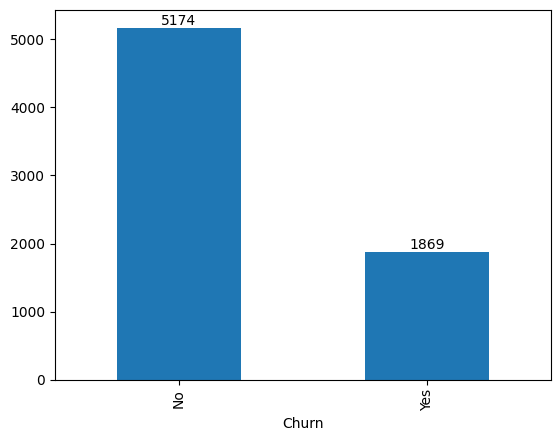

In [133]:
# Plot distribuição Churn (Quantidade)
ax = df_churn.Churn.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

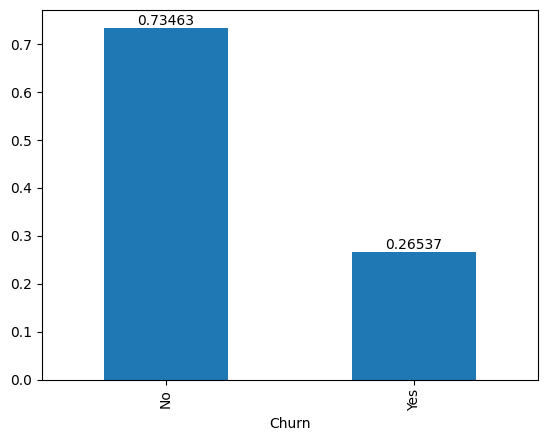

In [135]:
# Plot distribuição Churn (Quantidade)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [137]:
# Quais são os tipos de contrato
df_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

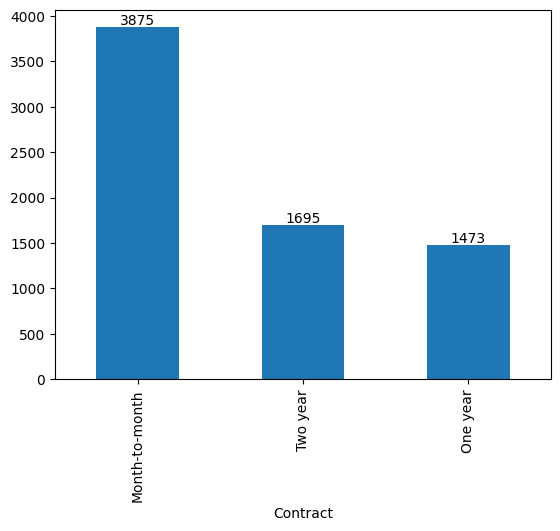

In [138]:
ax = df_churn.Contract.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

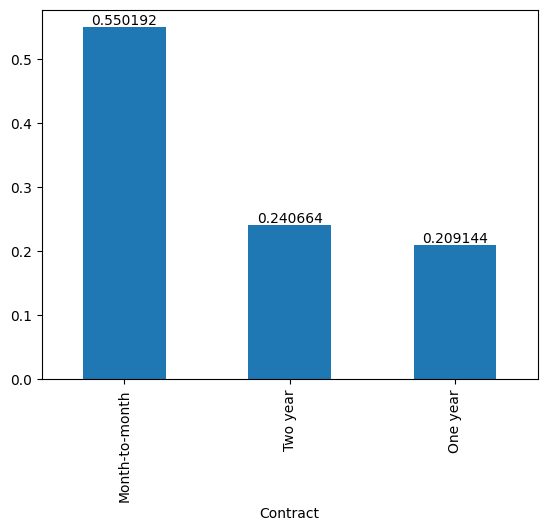

In [139]:
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

<Axes: ylabel='Frequency'>

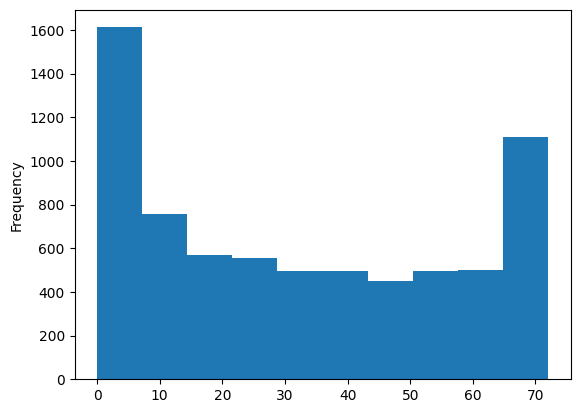

In [140]:
# Histograma do Tempo de Contrato
df_churn.tenure.plot.hist()

- A variável tempo de contrato (tenure) não apresenta visualmente uma distribuição normal
- Concentração nos extremos, ou seja, contratos com poucos meses e contratos longos

In [ ]:
# Histograma do MonthlyCharges
df_churn.MonthlyCharges.plot.hist()

In [143]:
# Medidas de Posição - Media Tempo de Contrato
df_churn.tenure.mean()

np.float64(32.37114865824223)

In [145]:
# Medidas de Posição - Mediana Tempo de Contrato
df_churn.tenure.median()

np.float64(29.0)

In [147]:
# Medidas de Posição - Moda Tempo de Contrato
df_churn.tenure.mode()

0    1
Name: tenure, dtype: int64

In [149]:
# Medias de Dispersão - Desvio Padrão Tempo de Contrato
df_churn.tenure.std()

np.float64(24.55948102309446)

In [151]:
# Medidas de Dispersão - Coeficiente de Variação
df_churn.tenure.std() / df_churn.tenure.mean() * 100

np.float64(75.86842617906674)

In [155]:
# Quantos clientes possuem 1 mês de contrato - Filtro
len(df_churn[(df_churn.tenure == 1)])

613

In [157]:
# Quantos os clientes de 1 mês de contrato representem percentualmente
len(df_churn[(df_churn.tenure == 1)]) / len(df_churn) * 100

8.70367741019452

In [160]:
# Quantos clientes possuem entre 1 e 6 meses de contrato
len(df_churn[(df_churn.tenure >= 1) & (df_churn.tenure<=6)])

1470

In [164]:
# Apresentar a quantidade de clientes por tempo de contrato - Agrupamento por sumarização
df_churn.groupby(['tenure'])['tenure'].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

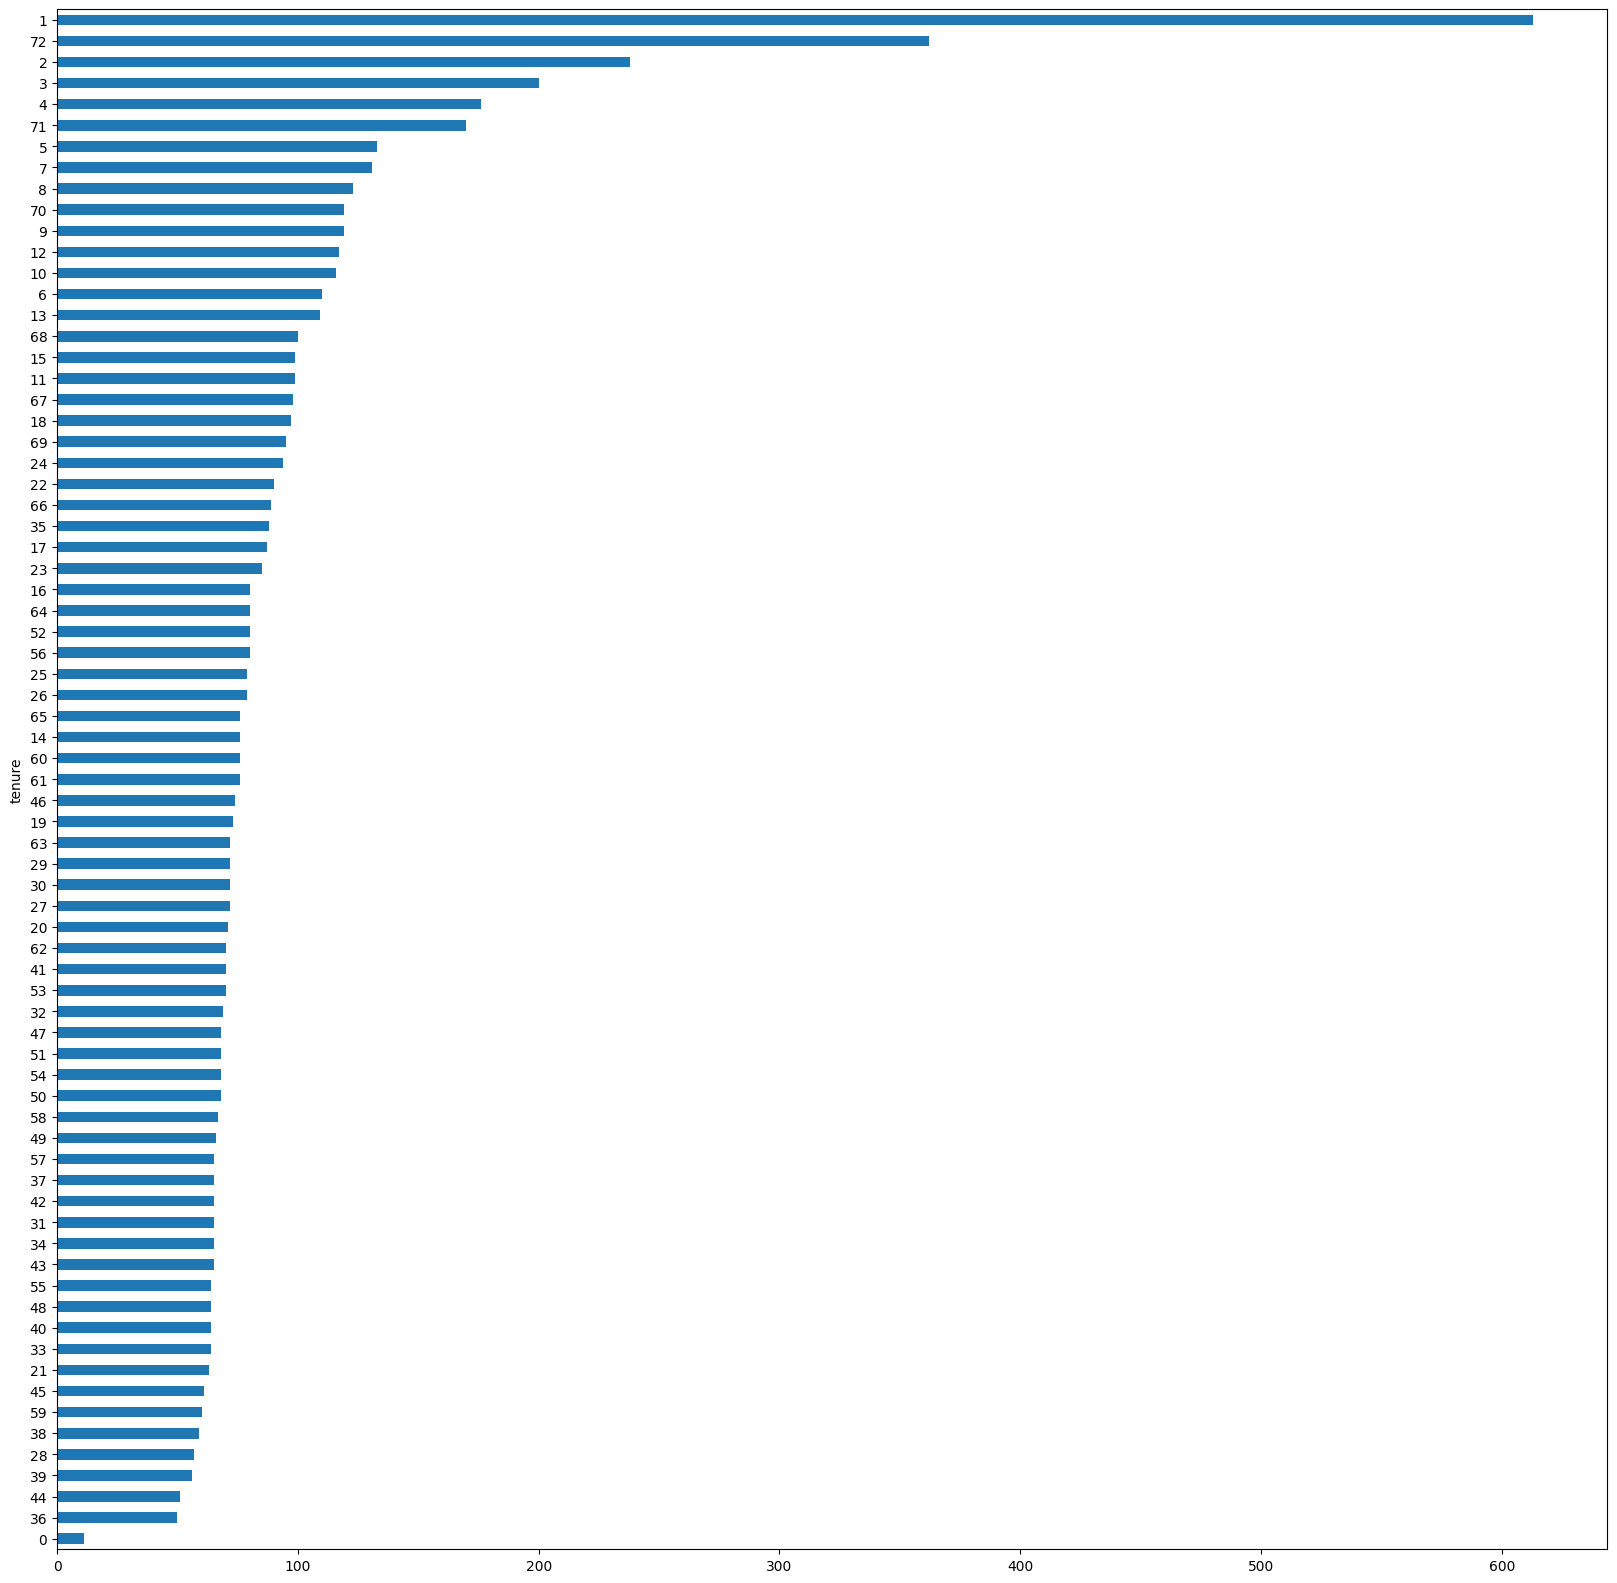

In [167]:
# Apresentar a quantidade de clientes por tempo de contrato - Agrupamento por sumarização - Em um plot
df_churn.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize = (20,20))